In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras.backend as K
import ast
from sklearn.model_selection import train_test_split

n_points=1000
noise_level=0.05
masse_min, masse_max = 0, 1000

In [21]:
def generate_dataset_1(n) :
    
    X = np.empty((n,n_points))
    
    Masse=np.linspace(masse_min, masse_max, n_points)
    
    for _ in range(n) :
        
        Signal0=np.zeros((n_points))
        
        n_gros_pics=np.random.randint(2, 8)
        
        for k in range(n_gros_pics):
            #pic du milieu
            loc=int(np.random.uniform(masse_min, masse_max))
            Signal0[n_points*loc//(masse_max-masse_min)]=np.random.uniform(0.2,1)
            #pics autour
            n_petits_pics_gauche=np.random.randint(0,5)
            n_petits_pics_droite=np.random.randint(0,7)
            for i in range(1,n_petits_pics_gauche+1):
                if n_points*loc//(masse_max-masse_min)-10*i>0:
                    Signal0[n_points*loc//(masse_max-masse_min)-10*i]=min(5*Signal0[n_points*loc//(masse_max-masse_min)]/(10*i),1)+np.random.normal(0,0.02)
            for j in range(1,n_petits_pics_droite+1):
                if n_points*loc//(masse_max-masse_min)+10*j<n_points:
                    Signal0[n_points*loc//(masse_max-masse_min)+10*j]=min(5*Signal0[n_points*loc//(masse_max-masse_min)]/(10*j),1)+np.random.normal(0,0.02)
        
        X[_]=Signal0
        
        return(X)


def generate_dataset_2(n) :
    
    X = np.empty((n,n_points))
    
    Masse=np.linspace(masse_min, masse_max, n_points)
    
    for _ in range(n) :
        
        Signal0=np.zeros((n_points))
        
        n_gros_pics=np.random.randint(1, 6)
        
        for k in range(n_gros_pics):
            #pic du milieu
            loc=int(np.random.exponential(scale=(masse_min+masse_max)/2, size=1))
            if loc<masse_max :
              Signal0[n_points*loc//(masse_max-masse_min)]=np.random.uniform(0.2,1)
              #pics autour
              n_petits_pics_gauche=np.random.randint(0,4)
              n_petits_pics_droite=np.random.randint(0,6)
              for i in range(1,n_petits_pics_gauche+1):
                  noise=np.random.normal(0,1)
                  if round(n_points*loc/(masse_max-masse_min)+noise)-10*i>0:
                      Signal0[round(n_points*loc/(masse_max-masse_min)+noise)-10*i]=min(5*Signal0[n_points*loc//(masse_max-masse_min)]/(10*i),1)+np.random.normal(0,0.02)
              for j in range(1,n_petits_pics_droite+1):
                  noise=np.random.normal(0,1)
                  if round(n_points*loc/(masse_max-masse_min)+noise)+10*j<n_points:
                      Signal0[round(n_points*loc/(masse_max-masse_min)+noise)+10*j]=min(5*Signal0[n_points*loc//(masse_max-masse_min)]/(10*j),1)+np.random.normal(0,0.02)
        
        X[_]=Signal0
        
        return(X)


def generate_dataset_3(n) :
    
    X = np.empty((n,n_points))
    
    Masse=np.linspace(masse_min, masse_max, n_points)
    
    for _ in range(n) :
        
        Signal0=np.zeros((n_points))
        
        n_gros_pics=np.random.poisson(lam=2)
        
        for k in range(n_gros_pics):
            #pic du milieu
            loc=int(np.random.exponential(scale=(masse_min+masse_max)/2, size=1))
            if loc<masse_max :
              Signal0[n_points*loc//(masse_max-masse_min)]=np.random.uniform(0.2,1)
              #pics autour
              n_petits_pics_gauche=np.random.poisson()
              n_petits_pics_droite=np.random.poisson()
              for i in range(1,n_petits_pics_gauche+1):
                  noise=np.random.normal(0,1)
                  if round(n_points*loc/(masse_max-masse_min)+noise)-10*i>0:
                      Signal0[round(n_points*loc/(masse_max-masse_min)+noise)-10*i]=min(5*Signal0[n_points*loc//(masse_max-masse_min)]/(10*i),1)+np.random.normal(0,0.02)
              for j in range(1,n_petits_pics_droite+1):
                  noise=np.random.normal(0,1)
                  if round(n_points*loc/(masse_max-masse_min)+noise)+10*j<n_points:
                      Signal0[round(n_points*loc/(masse_max-masse_min)+noise)+10*j]=min(5*Signal0[n_points*loc//(masse_max-masse_min)]/(10*j),1)+np.random.normal(0,0.02)
        
        X[_]=Signal0
        
        return(X)



In [22]:
def sample_dataset(n):

  MSdata = pd.read_csv('MSdata.csv', encoding='mac_roman')
  sample=MSdata.sample(n=n).reset_index(drop=True)

  X = np.empty((n,n_points))

  for i in range(n):
    Signal0=np.zeros((n_points))
    peaks = ast.literal_eval(str(sample['peak'][i]).replace("'",""))
    intensites = ast.literal_eval(str(sample['intensitÈ'][i]).replace("'",""))
    for k in range(len(peaks)) :
      if peaks[k]<masse_max:
        Signal0[n_points*int(peaks[k])//(masse_max-masse_min)]=intensites[k]/max(intensites)
    
    X[i]=Signal0
        
  return(X)

In [23]:
def get_model():
  model=models.Sequential()
  model.add(layers.Dense(200, activation='relu', input_shape=input_shape))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20, activation='relu', input_shape=input_shape))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model


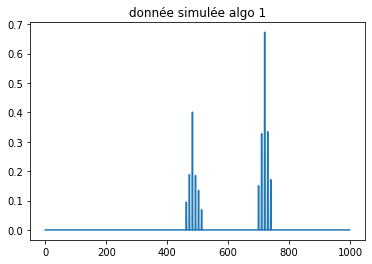

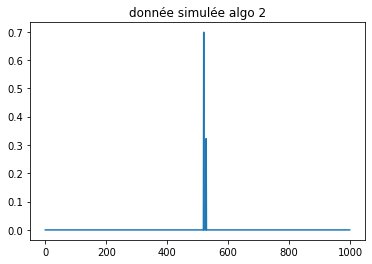

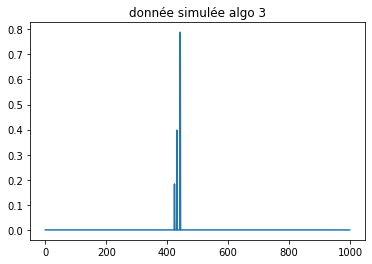

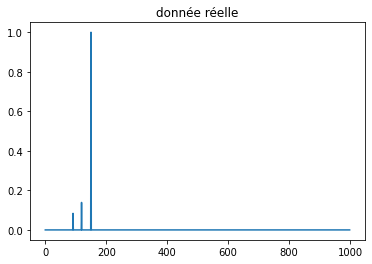

In [24]:
size=10000
X_sample = sample_dataset(size)

X_1 = np.vstack([generate_dataset_1(size), X_sample])
y_1 = np.vstack([size*[1], size*[0]]).reshape(-1,1)

X_2 = np.vstack([generate_dataset_2(size), X_sample])
y_2 = np.vstack([size*[1], size*[0]]).reshape(-1,1)

X_3 = np.vstack([generate_dataset_3(size), X_sample])
y_3 = np.vstack([size*[1], size*[0]]).reshape(-1,1)

plt.plot(X_1[0])
plt.title("donnée simulée algo 1")
plt.show()
plt.plot(X_2[0])
plt.title("donnée simulée algo 2")
plt.show()
plt.plot(X_3[0])
plt.title("donnée simulée algo 3")
plt.show()
plt.plot(X_1[-1])
plt.title("donnée réelle")
plt.show()

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, random_state=0)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, random_state=0)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, random_state=0)

input_shape=X_1_train.shape[1:]

In [25]:
ep=5

print('fitting model 1')
model_1 = get_model()
model_1.fit(X_1_train, y_1_train, epochs=ep, validation_split=0.2)

print('fitting model 2')
model_2 = get_model()
model_2.fit(X_2_train, y_2_train, epochs=ep, validation_split=0.2)

print('fitting model 3')
model_3 = get_model()
model_3.fit(X_3_train, y_3_train, epochs=ep, validation_split=0.2)

fitting model 1
Epoch 1/5
375/375 [==============================] - 1s 3ms/step - loss: 0.4593 - accuracy: 0.8303 - val_loss: 0.2790 - val_accuracy: 0.9953
Epoch 2/5
375/375 [==============================] - 1s 2ms/step - loss: 0.2542 - accuracy: 0.9955 - val_loss: 0.2120 - val_accuracy: 0.9950
Epoch 3/5
375/375 [==============================] - 1s 2ms/step - loss: 0.1898 - accuracy: 0.9971 - val_loss: 0.1668 - val_accuracy: 0.9947
Epoch 4/5
375/375 [==============================] - 1s 2ms/step - loss: 0.1506 - accuracy: 0.9963 - val_loss: 0.1321 - val_accuracy: 0.9947
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.9973 - val_loss: 0.1063 - val_accuracy: 0.9953
fitting model 2
Epoch 1/5
375/375 [==============================] - 1s 3ms/step - loss: 0.4260 - accuracy: 0.8287 - val_loss: 0.0491 - val_accuracy: 0.9850
Epoch 2/5
375/375 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9896 - val_loss: 0.0344 - va

In [26]:
scores_1 = model_1.evaluate(X_1_test, y_1_test, verbose=0)
print('Accuracy on test data for algo 1 : {:.4f}'.format(scores_1[1]))

scores_2 = model_2.evaluate(X_2_test, y_2_test, verbose=0)
print('Accuracy on test data for algo 2 : {:.4f}'.format(scores_2[1]))

scores_3 = model_3.evaluate(X_3_test, y_3_test, verbose=0)
print('Accuracy on test data for algo 3 : {:.4f}'.format(scores_3[1]))    

Accuracy on test data for algo 1 : 0.9958
Accuracy on test data for algo 2 : 0.9946
Accuracy on test data for algo 3 : 0.9956
